In [203]:
import pandas as pd
import umap
import glob
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
# from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA, FastICA
# import psyplot.project as psy
from sklearn.svm import SVR

from sklearn.decomposition import PCA, KernelPCA

from matplotlib.colors import LogNorm
import math

In [205]:
path = "/neurospin/dico/data/deep_folding/current/models/Champollion_V0/SC-sylv_right"
model_path = glob.glob(f"{path}/*")[0]
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
print(ukb_emb_file)

/neurospin/dico/data/deep_folding/current/models/Champollion_V0/SC-sylv_right/22-54-28_95/ukb_random_embeddings/full_embeddings.csv


In [4]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-9.397853,-35.405590,-25.079344,1.952184,-19.972496,-8.288961,-21.351015,-28.941086,14.200539,18.815380,...,5.467611,-1.440746,-9.597624,10.967900,-73.610664,162.052490,-41.156590,-51.056423,-55.806274,17.288927
sub-1000458,11.864086,-26.611752,51.420364,-52.141407,-19.606432,-17.154934,13.616233,-33.766083,40.711372,24.172370,...,-15.282716,-60.521446,-10.366796,-18.290610,-83.278940,-48.872210,-23.893742,35.333700,-83.225410,-11.684866
sub-1000575,-0.916660,-3.834316,-12.096986,-14.833730,-66.752760,-7.132909,71.045790,-60.284702,2.123185,-8.317797,...,54.291000,-70.665700,-20.531849,-18.447506,-50.931026,24.734211,3.501041,19.233213,-10.127567,38.024490
sub-1000606,13.133901,7.868631,-3.851482,2.200339,-20.809793,18.529005,40.183510,-29.606112,81.371380,24.674522,...,62.446170,-49.731762,81.763160,43.265540,-38.623330,70.039170,-1.021190,-13.735427,-57.432194,-23.378992
sub-1000963,-5.033243,61.420590,60.013200,-48.290737,-89.211340,2.998822,-5.769951,-31.626528,-1.094553,-7.087090,...,44.506670,10.611252,-51.272385,0.713129,-50.384980,179.183870,-45.166300,40.655230,-14.071226,1.027238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-23.875568,-20.369925,-10.114139,8.497796,19.743439,-5.022297,-51.175220,36.730576,11.231433,25.735909,...,17.881039,-26.250060,-22.905369,30.185420,-135.401170,88.477660,-31.561558,-88.319770,-80.582306,-48.112698
sub-6023808,-17.022070,2.933587,23.517857,30.213370,-47.568900,-39.646230,13.305735,7.856891,27.680082,42.094048,...,26.291492,29.331463,-16.351720,33.746136,-3.863405,146.014040,-31.691254,-8.830033,-40.683437,-28.179550
sub-6023847,53.887024,17.242167,34.166496,-43.858322,-25.792906,-27.758825,-4.378509,-6.804362,-17.727654,-4.691016,...,83.079970,-24.794035,-26.840294,-18.577978,-5.273275,50.181717,44.146330,10.682453,-42.679310,-50.688835


# UKBioBank

In [5]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [6]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-9.397853,-35.405590,-25.079344,1.952184,-19.972496,-8.288961,-21.351015,-28.941086,14.200539,18.815380,...,5.467611,-1.440746,-9.597624,10.967900,-73.610664,162.052490,-41.156590,-51.056423,-55.806274,17.288927
sub-1000458,11.864086,-26.611752,51.420364,-52.141407,-19.606432,-17.154934,13.616233,-33.766083,40.711372,24.172370,...,-15.282716,-60.521446,-10.366796,-18.290610,-83.278940,-48.872210,-23.893742,35.333700,-83.225410,-11.684866
sub-1000575,-0.916660,-3.834316,-12.096986,-14.833730,-66.752760,-7.132909,71.045790,-60.284702,2.123185,-8.317797,...,54.291000,-70.665700,-20.531849,-18.447506,-50.931026,24.734211,3.501041,19.233213,-10.127567,38.024490
sub-1000606,13.133901,7.868631,-3.851482,2.200339,-20.809793,18.529005,40.183510,-29.606112,81.371380,24.674522,...,62.446170,-49.731762,81.763160,43.265540,-38.623330,70.039170,-1.021190,-13.735427,-57.432194,-23.378992
sub-1000963,-5.033243,61.420590,60.013200,-48.290737,-89.211340,2.998822,-5.769951,-31.626528,-1.094553,-7.087090,...,44.506670,10.611252,-51.272385,0.713129,-50.384980,179.183870,-45.166300,40.655230,-14.071226,1.027238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-23.875568,-20.369925,-10.114139,8.497796,19.743439,-5.022297,-51.175220,36.730576,11.231433,25.735909,...,17.881039,-26.250060,-22.905369,30.185420,-135.401170,88.477660,-31.561558,-88.319770,-80.582306,-48.112698
sub-6023808,-17.022070,2.933587,23.517857,30.213370,-47.568900,-39.646230,13.305735,7.856891,27.680082,42.094048,...,26.291492,29.331463,-16.351720,33.746136,-3.863405,146.014040,-31.691254,-8.830033,-40.683437,-28.179550
sub-6023847,53.887024,17.242167,34.166496,-43.858322,-25.792906,-27.758825,-4.378509,-6.804362,-17.727654,-4.691016,...,83.079970,-24.794035,-26.840294,-18.577978,-5.273275,50.181717,44.146330,10.682453,-42.679310,-50.688835


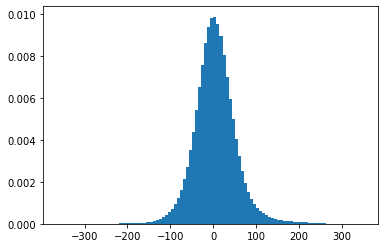

In [7]:
p = plt.hist(ukb_emb.values.ravel(), bins=100, density=True)

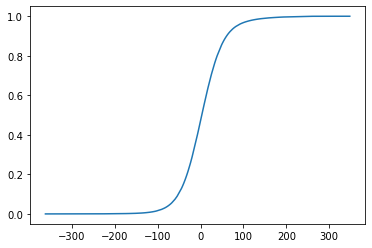

In [8]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [9]:
X2[int(N*0.59)]

12.124469

In [10]:
len(ukb_emb)

21051

In [11]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [12]:
ukb_positive

dim147    1.000000
dim129    1.000000
dim231    1.000000
dim175    0.998955
dim183    0.992827
            ...   
dim141    0.101705
dim172    0.101563
dim120    0.095292
dim189    0.077193
dim229    0.002898
Length: 256, dtype: float64

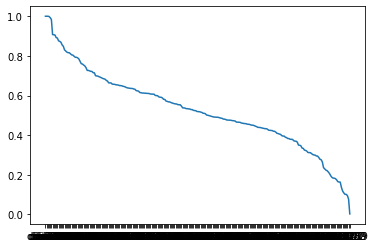

In [13]:
plt.plot(ukb_positive)

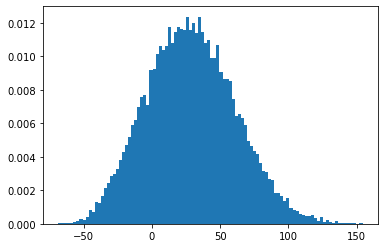

In [14]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

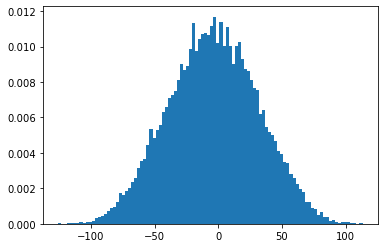

In [15]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [16]:
def compute_umap(df, n_neighbors=15, n_components=2):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [17]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

In [18]:
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-9.397853,-35.405590,-25.079344,1.952184,-19.972496,-8.288961,-21.351015,-28.941086,14.200539,18.815380,...,5.467611,-1.440746,-9.597624,10.967900,-73.610664,162.052490,-41.156590,-51.056423,-55.806274,17.288927
sub-1000458,11.864086,-26.611752,51.420364,-52.141407,-19.606432,-17.154934,13.616233,-33.766083,40.711372,24.172370,...,-15.282716,-60.521446,-10.366796,-18.290610,-83.278940,-48.872210,-23.893742,35.333700,-83.225410,-11.684866
sub-1000575,-0.916660,-3.834316,-12.096986,-14.833730,-66.752760,-7.132909,71.045790,-60.284702,2.123185,-8.317797,...,54.291000,-70.665700,-20.531849,-18.447506,-50.931026,24.734211,3.501041,19.233213,-10.127567,38.024490
sub-1000606,13.133901,7.868631,-3.851482,2.200339,-20.809793,18.529005,40.183510,-29.606112,81.371380,24.674522,...,62.446170,-49.731762,81.763160,43.265540,-38.623330,70.039170,-1.021190,-13.735427,-57.432194,-23.378992
sub-1000963,-5.033243,61.420590,60.013200,-48.290737,-89.211340,2.998822,-5.769951,-31.626528,-1.094553,-7.087090,...,44.506670,10.611252,-51.272385,0.713129,-50.384980,179.183870,-45.166300,40.655230,-14.071226,1.027238


In [19]:
reduced_ukb_emb, reducer_red = compute_umap(ukb_emb, n_neighbors=15, n_components=20)

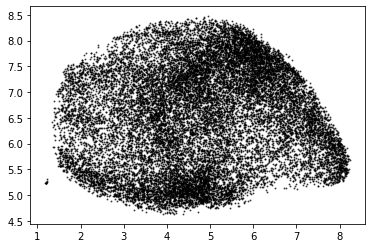

In [20]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [21]:
reduced_ukb_emb.shape

(21051, 20)

In [22]:
umap_ukb = visual_ukb_emb

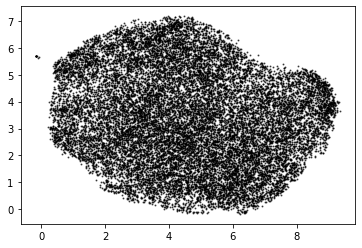

In [23]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

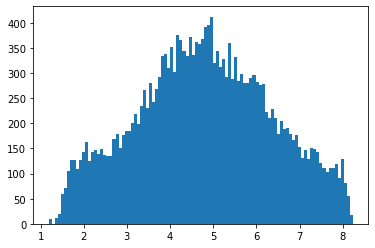

In [24]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

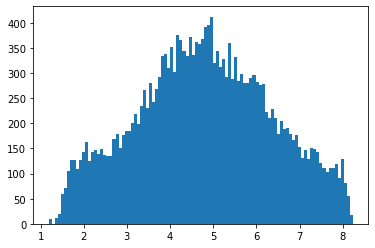

In [25]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

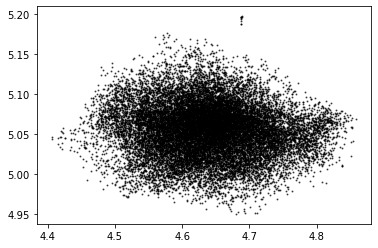

In [26]:
plt.scatter(reduced_ukb_emb[:,14], reduced_ukb_emb[:,15], c='black', s=1, alpha=0.6)

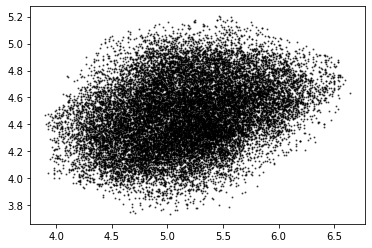

In [27]:
plt.scatter(reduced_ukb_emb[:,4], reduced_ukb_emb[:,5], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [28]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=5000)

In [29]:
global_id.dimension_

7.3157500185522055

In [30]:
umap_id = skdim.id.MOM().fit(reduced_ukb_emb, n_neighbors=1000)
umap_id.dimension_

4.1640623069221485

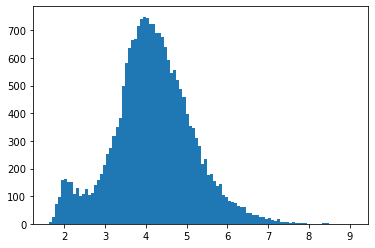

In [31]:
h = plt.hist(umap_id.dimension_pw_, bins=100)

In [32]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [33]:
# lid_mom.dimension_

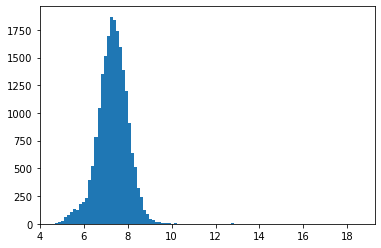

In [34]:

h = plt.hist(global_id.dimension_pw_, bins=100)

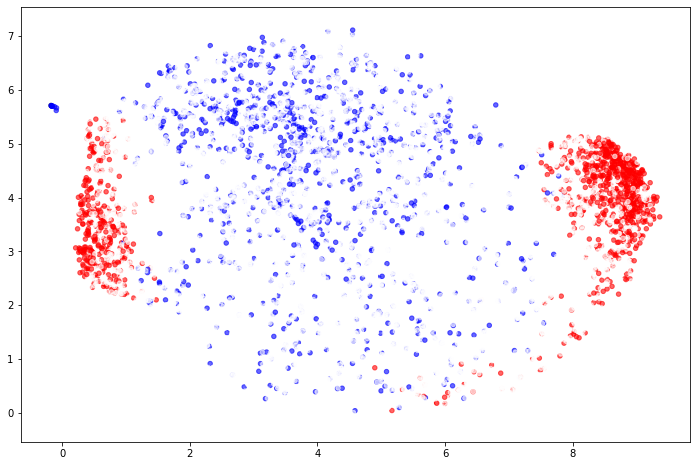

In [35]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

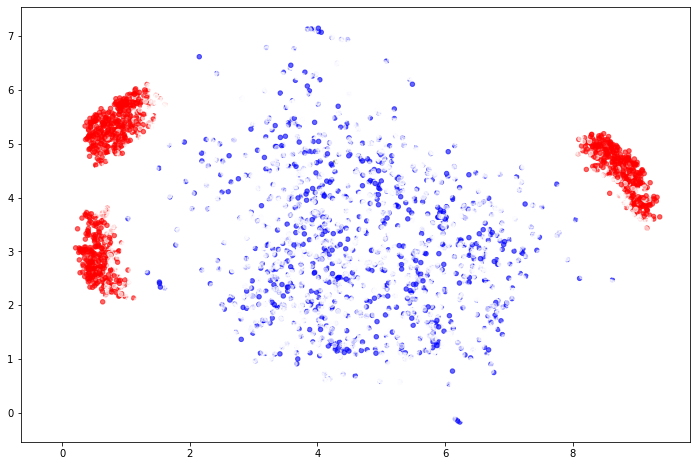

In [36]:
plt.figure(figsize=(12,8))
q_min = np.min(umap_id.dimension_pw_)
q_05 = np.quantile(umap_id.dimension_pw_, 0.05) 
q_95 = np.quantile(umap_id.dimension_pw_, 0.95)
q_max = np.max(umap_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=umap_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [37]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(ukb_emb)
distances, indices = nbrs.kneighbors(ukb_emb)

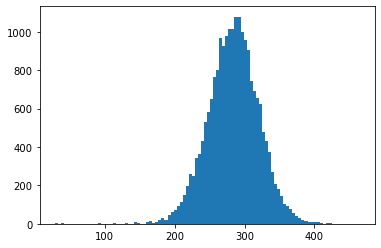

In [38]:
h = plt.hist(distances[:,1], bins=100)

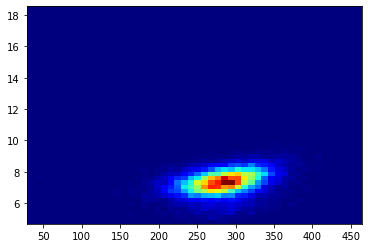

In [39]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

# UMAP of only lower dimensions

In [40]:
ukb_red = ukb_emb.copy(deep=True)
ukb_red.insert(0, "id", global_id.dimension_pw_)

In [41]:
ukb_red.insert(1, "umap_0", umap_ukb[:,0])
ukb_red.insert(2, "umap_1", umap_ukb[:,1])
ukb_red.insert(3, "distance", distances[:,1])
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,6.393277,5.628027,0.856375,272.403789,-9.397853,-35.405590,-25.079344,1.952184,-19.972496,-8.288961,...,5.467611,-1.440746,-9.597624,10.967900,-73.610664,162.052490,-41.156590,-51.056423,-55.806274,17.288927
sub-1000458,7.186698,1.494101,2.741848,302.999882,11.864086,-26.611752,51.420364,-52.141407,-19.606432,-17.154934,...,-15.282716,-60.521446,-10.366796,-18.290610,-83.278940,-48.872210,-23.893742,35.333700,-83.225410,-11.684866
sub-1000575,7.828705,2.740370,2.760251,278.627704,-0.916660,-3.834316,-12.096986,-14.833730,-66.752760,-7.132909,...,54.291000,-70.665700,-20.531849,-18.447506,-50.931026,24.734211,3.501041,19.233213,-10.127567,38.024490
sub-1000606,7.943624,1.474882,5.355317,323.526125,13.133901,7.868631,-3.851482,2.200339,-20.809793,18.529005,...,62.446170,-49.731762,81.763160,43.265540,-38.623330,70.039170,-1.021190,-13.735427,-57.432194,-23.378992
sub-1000963,6.630663,6.514361,5.287498,246.453326,-5.033243,61.420590,60.013200,-48.290737,-89.211340,2.998822,...,44.506670,10.611252,-51.272385,0.713129,-50.384980,179.183870,-45.166300,40.655230,-14.071226,1.027238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,6.365986,7.510695,0.831073,255.605439,-23.875568,-20.369925,-10.114139,8.497796,19.743439,-5.022297,...,17.881039,-26.250060,-22.905369,30.185420,-135.401170,88.477660,-31.561558,-88.319770,-80.582306,-48.112698
sub-6023808,6.860034,6.618107,2.623180,274.384547,-17.022070,2.933587,23.517857,30.213370,-47.568900,-39.646230,...,26.291492,29.331463,-16.351720,33.746136,-3.863405,146.014040,-31.691254,-8.830033,-40.683437,-28.179550
sub-6023847,7.424456,3.910495,3.005827,249.315077,53.887024,17.242167,34.166496,-43.858322,-25.792906,-27.758825,...,83.079970,-24.794035,-26.840294,-18.577978,-5.273275,50.181717,44.146330,10.682453,-42.679310,-50.688835


In [42]:
ukb_red = ukb_red[ukb_red.id < np.quantile(global_id.dimension_pw_, 0.05) ]
# ukb_red = ukb_red[ukb_red.umap_0 > 6]

In [43]:
ukb_red.head()

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1004717,5.884988,7.966721,3.951891,274.274604,3.042429,20.012655,22.892963,-65.950860,-56.198593,38.157950,...,106.054130,-58.713840,-44.021340,-7.193491,-67.210884,259.13144,-38.578130,-1.501304,-4.778183,-7.738482
sub-1006457,5.487738,0.396723,2.991581,283.283332,-3.210293,-33.647877,64.356730,-59.582580,-19.702244,15.776929,...,0.664687,-17.265038,-27.789465,-38.894676,-58.350376,-47.21895,-84.084120,85.986176,-81.436790,-4.833756
sub-1009695,5.581022,7.853699,3.960867,213.238825,-6.142858,-5.443119,28.432922,-48.471210,-39.624836,30.247444,...,81.702340,-25.223005,-24.117846,-10.614650,-35.184010,264.52570,-42.901005,9.778398,15.367248,15.409867
sub-1009864,5.832983,0.668330,5.100180,258.595006,-38.834476,-64.500770,49.621082,6.876041,14.523872,36.560510,...,21.090046,-76.732056,48.072990,10.242805,-79.243450,16.74211,-10.082794,46.987576,-36.786910,27.218988
sub-1011197,5.417022,8.701915,4.767638,316.468643,2.389818,32.768208,51.841988,-37.646490,-34.674854,53.531082,...,49.585520,-0.342288,-20.448324,-23.234926,-65.879364,210.05910,-92.935980,21.321539,-15.366425,-15.200899


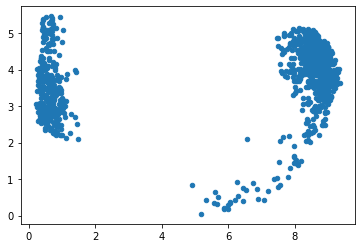

In [44]:
plt.scatter(ukb_red.umap_0, ukb_red.umap_1, s=20)

In [45]:
ukb_umap_red, reducer_red = compute_umap(ukb_red[4:], n_neighbors=15)

In [46]:
red_id = skdim.id.MOM().fit(ukb_red[4:], n_neighbors=500)
red_id.dimension_

4.127381422985971

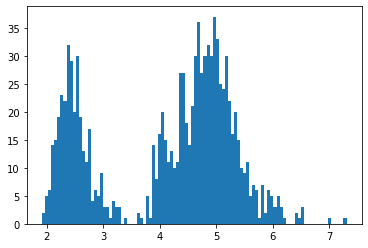

In [47]:
h = plt.hist(red_id.dimension_pw_, bins=100)

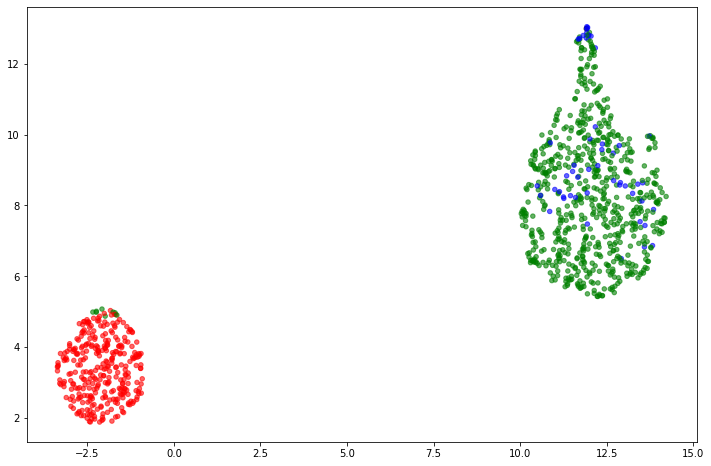

In [48]:
plt.figure(figsize=(12,8))
q_min = np.min(red_id.dimension_pw_)
q_05 = np.quantile(red_id.dimension_pw_, 0.05) 
q_95 = np.quantile(red_id.dimension_pw_, 0.95)
q_max = np.max(red_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, 3.5, q_95, q_max], ['red', 'green', 'blue'])
alpha = []
plt.scatter(ukb_umap_red[:,0], ukb_umap_red[:,1], s=20, c=red_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

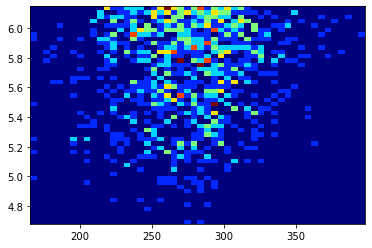

In [49]:
heatmap, xedges, yedges = np.histogram2d(ukb_red.distance, ukb_red.id, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [50]:
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1004717,5.884988,7.966721,3.951891,274.274604,3.042429,20.012655,22.892963,-65.950860,-56.198593,38.157950,...,106.054130,-58.713840,-44.021340,-7.193491,-67.210884,259.13144,-38.578130,-1.501304,-4.778183,-7.738482
sub-1006457,5.487738,0.396723,2.991581,283.283332,-3.210293,-33.647877,64.356730,-59.582580,-19.702244,15.776929,...,0.664687,-17.265038,-27.789465,-38.894676,-58.350376,-47.21895,-84.084120,85.986176,-81.436790,-4.833756
sub-1009695,5.581022,7.853699,3.960867,213.238825,-6.142858,-5.443119,28.432922,-48.471210,-39.624836,30.247444,...,81.702340,-25.223005,-24.117846,-10.614650,-35.184010,264.52570,-42.901005,9.778398,15.367248,15.409867
sub-1009864,5.832983,0.668330,5.100180,258.595006,-38.834476,-64.500770,49.621082,6.876041,14.523872,36.560510,...,21.090046,-76.732056,48.072990,10.242805,-79.243450,16.74211,-10.082794,46.987576,-36.786910,27.218988
sub-1011197,5.417022,8.701915,4.767638,316.468643,2.389818,32.768208,51.841988,-37.646490,-34.674854,53.531082,...,49.585520,-0.342288,-20.448324,-23.234926,-65.879364,210.05910,-92.935980,21.321539,-15.366425,-15.200899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6013769,5.249071,8.582639,4.078120,292.410799,-1.291125,4.177840,58.944984,-108.136330,-21.653625,20.567598,...,130.052700,-55.974495,-53.569410,-19.143032,-102.240425,222.75067,-62.251392,-22.398458,-58.996770,-55.772038
sub-6014119,5.741205,8.767176,4.238795,333.327732,27.355017,65.599900,49.477320,-75.798410,-29.132286,44.918556,...,89.174250,-78.951730,-47.486767,-49.498820,-140.173140,156.04608,-47.267742,9.651866,-42.751860,-30.499273
sub-6016419,5.552406,9.048084,4.443986,301.372831,15.560782,6.406906,63.505684,-79.378040,23.447080,57.097244,...,121.076290,-48.463528,-31.471510,-50.741990,-82.642210,156.03531,-54.181087,6.840164,-12.750834,-38.957584


In [51]:
ukb_red2 = ukb_red[ukb_red.umap_0 > 6]
ukb_red2

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1004717,5.884988,7.966721,3.951891,274.274604,3.042429,20.012655,22.892963,-65.950860,-56.198593,38.157950,...,106.054130,-58.713840,-44.021340,-7.193491,-67.210884,259.13144,-38.578130,-1.501304,-4.778183,-7.738482
sub-1009695,5.581022,7.853699,3.960867,213.238825,-6.142858,-5.443119,28.432922,-48.471210,-39.624836,30.247444,...,81.702340,-25.223005,-24.117846,-10.614650,-35.184010,264.52570,-42.901005,9.778398,15.367248,15.409867
sub-1011197,5.417022,8.701915,4.767638,316.468643,2.389818,32.768208,51.841988,-37.646490,-34.674854,53.531082,...,49.585520,-0.342288,-20.448324,-23.234926,-65.879364,210.05910,-92.935980,21.321539,-15.366425,-15.200899
sub-1033527,5.559234,8.875755,3.751896,230.914397,-9.978430,22.622470,44.424873,-65.496600,-20.886698,15.577146,...,86.292175,-20.813904,-32.635773,-27.038475,-89.704346,154.23578,-50.148388,-25.646680,-39.736813,-18.084730
sub-1044244,5.771316,8.915668,2.822898,283.027481,11.066944,24.447220,39.285583,-30.662973,0.361388,59.638462,...,54.527096,-35.008440,-17.274360,-24.901096,-108.479805,159.18486,-26.063904,-48.189510,-39.835930,-40.303112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6013769,5.249071,8.582639,4.078120,292.410799,-1.291125,4.177840,58.944984,-108.136330,-21.653625,20.567598,...,130.052700,-55.974495,-53.569410,-19.143032,-102.240425,222.75067,-62.251392,-22.398458,-58.996770,-55.772038
sub-6014119,5.741205,8.767176,4.238795,333.327732,27.355017,65.599900,49.477320,-75.798410,-29.132286,44.918556,...,89.174250,-78.951730,-47.486767,-49.498820,-140.173140,156.04608,-47.267742,9.651866,-42.751860,-30.499273
sub-6016419,5.552406,9.048084,4.443986,301.372831,15.560782,6.406906,63.505684,-79.378040,23.447080,57.097244,...,121.076290,-48.463528,-31.471510,-50.741990,-82.642210,156.03531,-54.181087,6.840164,-12.750834,-38.957584


In [52]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_emb)
explained_all = my_model.explained_variance_ratio_.cumsum()

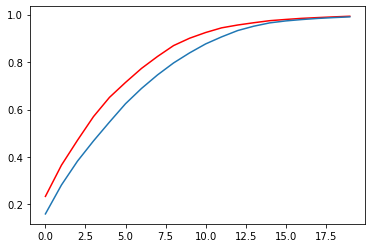

In [53]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_red2[4:])
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)
plt.show()

In [54]:
reduced_ukb_emb.shape

(21051, 20)

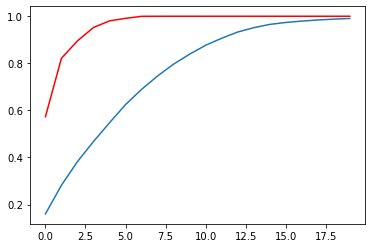

In [55]:
my_model = PCA(n_components=20)
on_axes = my_model.fit_transform(reduced_ukb_emb)
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)
plt.show()

In [56]:
explained

array([0.5730983 , 0.82143474, 0.89531386, 0.9522281 , 0.9802512 ,
       0.99109554, 0.99967134, 0.99997413, 0.9999888 , 0.9999928 ,
       0.9999957 , 0.99999815, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [57]:
on_axes.shape

(21051, 20)

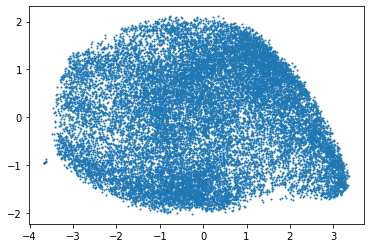

In [58]:
plt.scatter(on_axes[:,0], on_axes[:,1], s=1)

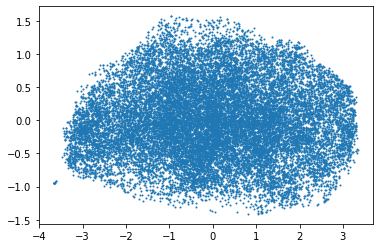

In [59]:
plt.scatter(on_axes[:,0], on_axes[:,2], s=1)
plt.show()

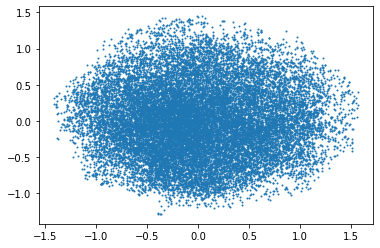

In [60]:
plt.scatter(on_axes[:,2], on_axes[:,3], s=1)
plt.show()

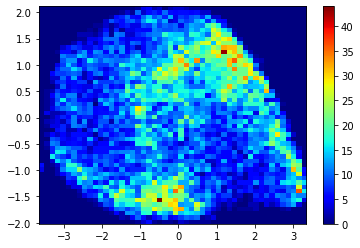

In [61]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

In [173]:
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=0.1, fit_inverse_transform=True, alpha=0.1
)
X_kernel_pca = kernel_pca.fit(on_axes[:3000,0:2])

In [174]:
X_kernel_pca =  kernel_pca.transform(on_axes[:,0:2])

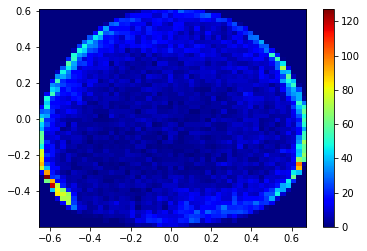

In [175]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,0], X_kernel_pca[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

In [195]:
def cart2pol(x, y, offset):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x) + offset
    return(rho, np.mod(phi, 2*np.pi))

In [199]:
rho, phi = cart2pol(X_kernel_pca[:,0], X_kernel_pca[:,1], 3*np.pi/4)

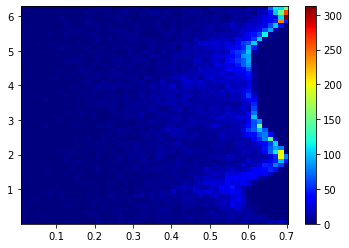

In [200]:
heatmap, xedges, yedges = np.histogram2d(rho, phi, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

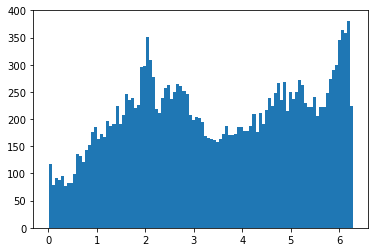

In [201]:
h = plt.hist(phi, bins=100)

In [180]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.diff(bins)

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=False, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

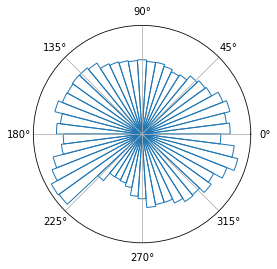

In [182]:
# Construct figure and axis to plot on
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))

# Visualise by area of bins
h = circular_hist(ax, phi, bins=50)

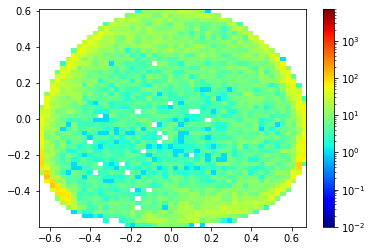

In [183]:
heatmap, xedges, yedges = np.histogram2d(X_kernel_pca[:,0], X_kernel_pca[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet, norm=LogNorm(vmin=0.01, vmax=7000))
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

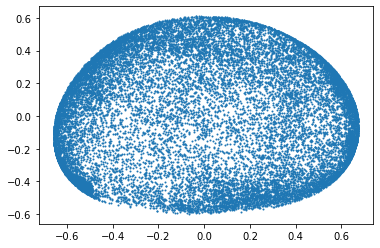

In [184]:
plt.scatter(X_kernel_pca[:,0], X_kernel_pca[:,1], s=1)
plt.show()

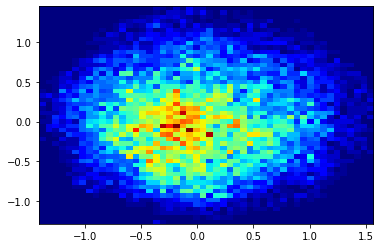

In [185]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,2], on_axes[:,3], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [67]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

X = ukb_emb
umap_embedding = reduced_ukb_emb

#MNIST variation explained by UMAP1
UMAP_matrix = pd.DataFrame(umap_embedding)
pls = PLSRegression(n_components = 1)
pls.fit(UMAP_matrix, X)
y_pred = pls.predict(UMAP_matrix)
print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
#0.07335034485651613

#Here the same but more explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07335034485652026


#Here the same but explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07265918428991347

0.0894726787330868
dim1     -369.859975
dim2     -217.596733
dim3     -362.159241
dim4     -313.879714
dim5     -331.431579
             ...    
dim252    -71.276966
dim253   -274.663911
dim254   -221.846460
dim255   -294.859423
dim256   -358.329465
Length: 256, dtype: float64
dim1     -369.859975
dim2     -217.596733
dim3     -362.159241
dim4     -313.879714
dim5     -331.431579
             ...    
dim252    -71.276966
dim253   -274.663911
dim254   -221.846460
dim255   -294.859423
dim256   -358.329465
Length: 256, dtype: float64


In [68]:
X = reduced_ukb_emb

explainable = np.zeros((X.shape[1],1))
for i in range(X.shape[1]):
    umap_embedding = reduced_ukb_emb[:,i]

    #MNIST variation explained by UMAP1
    UMAP_matrix = pd.DataFrame(umap_embedding)
    pls = PLSRegression(n_components = 1)
    pls.fit(UMAP_matrix, X)
    y_pred = pls.predict(UMAP_matrix)
    print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
    #0.07335034485651613

    #Here the same but more explicitly via the R^2 equation above
    # print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    # np.mean(X, axis = 0))**2))
    #0.07335034485652026


    #Here the same but explicitly via the R^2 equation above
    explainable[i] = 1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    np.mean(X, axis = 0))**2)
    #0.07265918428991347

0.5721308678198606
0.25425805187862827
0.23462509172964635
0.07975942494281385
0.08259518700675818
0.05768137864016681
0.05837887730297787
0.07267263387613761
0.05761938501364517
0.017904247572879808
0.04664112049324848
0.01258245101579144
0.012226043839965263
0.021857979314402514
0.035202658184237845
0.08388168386119707
0.11330574489976043
0.137482842047337
0.038577071520211496
0.11867093933647693


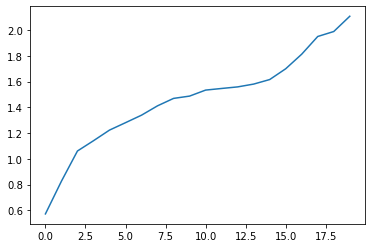

In [69]:
plt.plot(explainable.cumsum())